In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
cross_val_score(rfc, X_train, y_train, cv=5).mean()

array([0.96808333, 0.96566667, 0.96541667, 0.962     , 0.97108333])

In [3]:
from sklearn.metrics import accuracy_score

predictions = rfc.predict(X_test)
accuracy_score(y_test, predictions)

0.9705

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pipeline = make_pipeline(
    PCA(n_components=0.95),
    RandomForestClassifier(random_state=42)
)

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
accuracy_score(y_test, predictions)

0.9481

In [7]:
pipeline.named_steps

{'pca': PCA(n_components=0.95),
 'randomforestclassifier': RandomForestClassifier(random_state=42)}

In [10]:
pipeline['pca'].svd_solver

'auto'

# Exercise 10

In [32]:
import numpy as np

X_sample = mnist.data[:60_000][::12]
y_sample = mnist.target[:60_000][::12].astype(np.uint8)

In [31]:
from sklearn.manifold import TSNE

n_components = 2
tsne = TSNE(n_components=n_components,random_state=42)
mnist_reduced = tsne.fit_transform(X_sample)

/Users/lucaswerner/Desktop/hands-on-machine-learning/.env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/lucaswerner/Desktop/hands-on-machine-learning/.env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


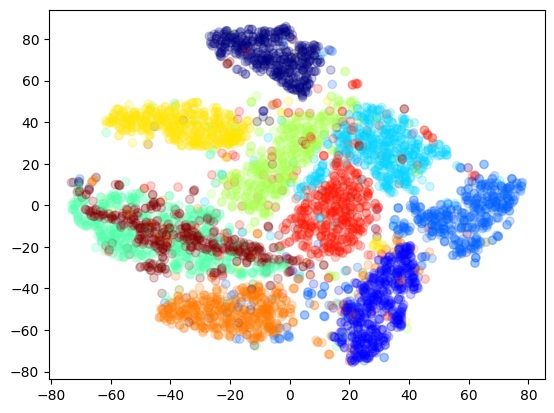

In [33]:
import matplotlib.pyplot as plt

plt.scatter(mnist_reduced[:,0],mnist_reduced[:,1], alpha=0.2, c=y_sample, cmap='jet')
plt.show()

In [34]:
tsne = TSNE(n_components=3,random_state=42)
X_3d = tsne.fit_transform(X_sample)

/Users/lucaswerner/Desktop/hands-on-machine-learning/.env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/lucaswerner/Desktop/hands-on-machine-learning/.env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


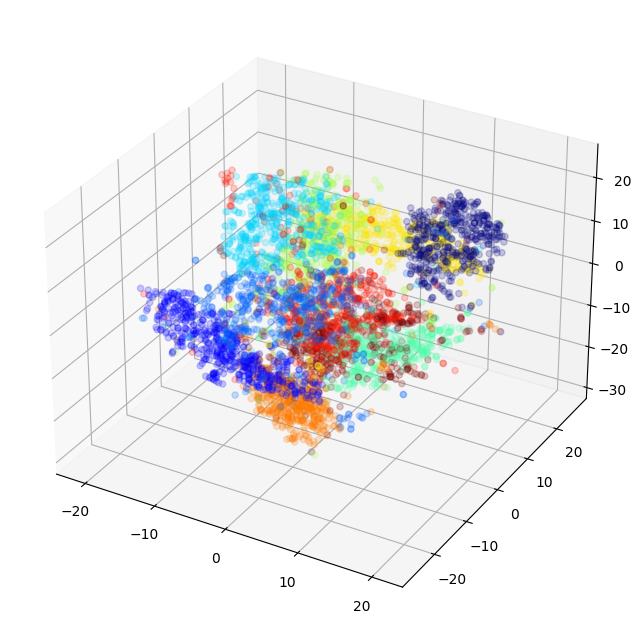

In [40]:
fig = plt.figure(1,figsize=(12,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_3d[:,0],X_3d[:,1],X_3d[:,2], alpha=0.2, c=y_sample, cmap='jet')
plt.show()